# **Q1-5**
Create dataset with [drawdata](https://github.com/koaning/drawdata) library and make classification by [Logisitic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) and [SGD Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier). Also use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [RandomizeSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) for tuning hyperparameters.


In [ ]:
# Install missing package
!pip install drawdata

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from drawdata import ScatterWidget

# A - Generate training data and spliting

🔴 Don't run following section to prevent overwriting!

In [ ]:
# Generate dataset
dataset = ScatterWidget()
dataset

ScatterWidget()

In [2]:
# Show dataset as dataframe
dataset.data_as_pandas

NameError: name 'dataset' is not defined

In [ ]:
# Extract training data and targets
X = dataset.data_as_pandas[['x','y']]
Y = dataset.data_as_pandas['label']

print(X.shape,Y.shape)

(1084, 2) (1084,)


Text(0.5, 1.0, 'Generated data set with drawdata library')

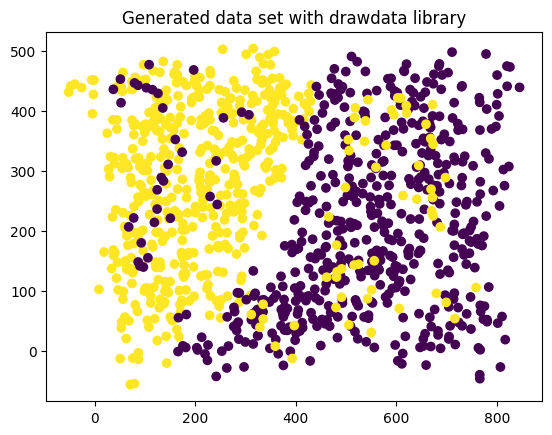

In [ ]:
# Assign numbers instead of letters for dot colors (a=1 and b=0)
Ynew = np.empty(shape = len(Y))
for i, val in enumerate(Y):
    if val == 'a':
        Ynew[i] = 1
    else:
        Ynew[i] = 0

# Plot dataset
plt.scatter(X['x'],X['y'], c=Ynew)
plt.title('Generated data set with drawdata library')

In [ ]:
# Split dataset for training and test
x_train , x_test , y_train , y_test = train_test_split(
    X, Y,
    test_size = 0.2,
    random_state = 24
    )

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((867, 2), (217, 2), (867,), (217,))

# B - Classification with Logistic Regression

In [ ]:
# Design model with default setting
logreg = LogisticRegression(random_state = 24)
LG1= logreg.fit(x_train, y_train)

In [ ]:
# Check accuray
LG1_train_score = LG1.score(x_train, y_train)
LG1_test_score = LG1.score(x_test, y_test)

print('Results of Logistic Regression with default settings:')
print('Accuracy of training =',LG1_train_score*100,'%')
print('Accuracy of test =',LG1_test_score*100,'%')

Results of Logistic Regression with default settings:
Accuracy of training = 88.23529411764706 %
Accuracy of test = 88.94009216589862 %


In [ ]:
# Tune hyperparameters with GridSearch method
search_space1 = {
    'solver':('lbfgs','newton-cg','sag','saga'),
    'max_iter':[100,1000,1000]
    }

logreg2 =  GridSearchCV(logreg, search_space1)
LG2 = logreg2.fit(x_train, y_train)

LG2_train_score = LG2.score(x_train, y_train)
LG2_test_score = LG2.score(x_test, y_test)

print('Results of Logistic Regression with hyperparameter tuning:')
print('Accuracy of training =', LG2_train_score*100,'%')
print('Accuracy of test =', LG2_test_score*100,'%')

print('Tuned Logistic Regression Parameters: ', LG2.best_params_)

Results of Logistic Regression with hyperparameter tuning:
Accuracy of training = 88.23529411764706 %
Accuracy of test = 88.94009216589862 %
Tuned Logistic Regression Parameters:  {'max_iter': 100, 'solver': 'lbfgs'}


# C - Classification with SGD Classifier

In [ ]:
# Design model with default setting
sgd = SGDClassifier(random_state = 24)
SGD1 = sgd.fit(x_train, y_train)

In [ ]:
# Check accuray
SGD1_train_score = SGD1.score(x_train, y_train)
SGD1_test_score = SGD1.score(x_test, y_test)

print('Results of SGD Classifier with default settings:')
print('Accuracy of training =',SGD1_train_score*100,'%')
print('Accuracy of test =',SGD1_test_score*100,'%')

Results of SGD Classifier with default settings:
Accuracy of training = 82.81430219146482 %
Accuracy of test = 84.7926267281106 %


In [ ]:
# Tune hyperparameters with GridSearch method
search_space2 = {
    'loss':('hinge','log_loss','modified_huber','squared_hinge','perceptron'),
    'penalty':('l1','l2','elasticnet', None),
    'learning_rate':('optimal','constant','invscaling','adaptive'),
    'max_iter':[1000, 10000, 100000],
    'alpha': np.linspace(0.00001, 0.1, 100000),
    'eta0': np.linspace(0,1,1000),
    }

sgd2 =  RandomizedSearchCV(sgd, search_space2, random_state = 24)
SGD2 = sgd2.fit(x_train, y_train)

SGD2_train_score = SGD2.score(x_train, y_train)
SGD2_test_score = SGD2.score(x_test, y_test)

print('Results of SGD Classifier with hyperparameter tuning:')
print('Accuracy of training =', SGD2_train_score*100,'%')
print('Accuracy of test =', SGD2_test_score*100,'%')

print('Tuned SGD Classifier Parameters: ', SGD2.best_params_)

Results of SGD Classifier with hyperparameter tuning:
Accuracy of training = 83.39100346020761 %
Accuracy of test = 82.48847926267281 %
Tuned SGD Classifier Parameters:  {'penalty': 'elasticnet', 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 'adaptive', 'eta0': 0.5675675675675675, 'alpha': 0.06217440464404645}


# D - Plot Decision Boundaries

In [ ]:
x1_min, x2_min = X.min(0)
x1_max, x2_max = X.max(0)

n = 1000
x1r = np.linspace(x1_min,x1_max,n)
x2r = np.linspace(x2_min,x2_max,n)

x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


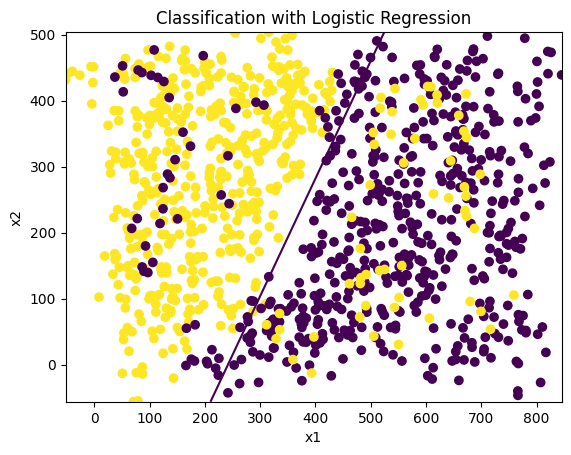

In [ ]:
# Decision boundaries of LG model
Y1 = LG2.decision_function(Xm)

plt.scatter(X['x'],X['y'], c=Ynew)
plt.contour(x1m, x2m, Y1.reshape(x1m.shape), levels=[0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Classification with Logistic Regression')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


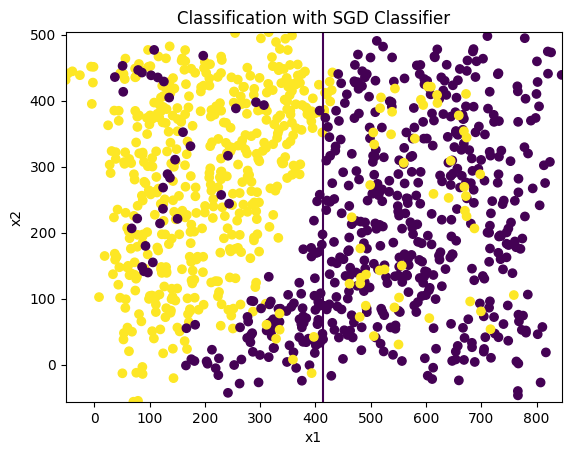

In [ ]:
# Decision boundaries of SGD model
Y2 = SGD2.decision_function(Xm)

plt.scatter(X['x'],X['y'], c=Ynew)
plt.contour(x1m, x2m, Y2.reshape(x1m.shape), levels=[0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Classification with SGD Classifier')
plt.show()